# LendingClub Loan Data Analysis — EDA Introduction

This project is based on the public LendingClub loan dataset and aims to explore the characteristics, risk patterns, and credit behaviors of borrowers on a leading U.S. peer-to-peer lending platform. Through Exploratory Data Analysis (EDA), we examine borrower profiles, loan product features, repayment and default distributions, as well as key business metrics such as credit grade and default rate. The goal is to uncover meaningful insights and provide a strong foundation for subsequent risk modeling and credit scoring.

## Analysis Objectives

- **Understand Borrower Profiles**: Examine distributions of basic attributes such as age, income, employment length, home ownership, and geographic location.
- **Explore Loan Features**: Analyze variables including loan amount, interest rate, term, loan purpose, and more.
- **Reveal Risk Structure**: Compare default rates (e.g., charged off/default vs fully paid) across different segments and investigate the relationship between credit-related features and default risk.
- **Lay the Foundation for Modeling**: Support further credit risk modeling (e.g., default prediction, credit scoring) through feature engineering and variable selection.

## Data Source

This analysis uses data from [Kaggle - LendingClub Loan Data](https://www.kaggle.com/datasets/wordsforthewise/lending-club):

- **accepted_2007_to_2018q4.csv**: Records of all approved and funded loans from 2007 to 2018, including detailed borrower attributes, loan details, payment status, and risk variables (over 100 fields).
- **rejected_2007_to_2018q4.csv** (optional): Basic information for all rejected loan applications (our main analysis focuses on accepted loans).
- This file only uses the first dataset.

**About the Data:**  
The LendingClub dataset is publicly available and widely used for research and practical work in fintech, credit risk analytics, and peer-to-peer lending.


In [2]:
import pandas as pd

In [12]:
accept=pd.read_csv("accepted_2007_to_2018q4.csv")

/var/folders/bt/159y_h211qb_80xw9cxg53rw0000gn/T/ipykernel_56497/3736983512.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accept=pd.read_csv("accepted_2007_to_2018q4.csv")


In [31]:
accept.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,68476668,NaN,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,67275481,NaN,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,68466926,NaN,10000.0,10000.0,10000.0,36 months,6.49,306.45,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,68616873,NaN,8000.0,8000.0,8000.0,36 months,11.48,263.74,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Variable Descriptions

Below is a description of each variable in the `accept` LendingClub dataset used for the analysis:

- **loan_amnt**: The total amount of money funded by investors for the loan (in USD).
- **int_rate**: The interest rate charged on the loan, expressed as an annual percentage.
- **term**: The duration of the loan, usually "36 months" or "60 months".
- **grade**: The loan grade assigned by LendingClub, reflecting credit risk (from A [highest] to G [lowest]).
- **sub_grade**: A more granular loan sub-grade within each grade (e.g., A1, A2, ..., G5).
- **purpose**: The stated reason for the loan application (e.g., debt_consolidation, home_improvement, small_business, etc.).
- **emp_length**: The borrower's employment length at the time of application (e.g., 10+ years, 2 years, < 1 year, etc.).
- **home_ownership**: The home ownership status of the borrower (e.g., RENT, MORTGAGE, OWN, OTHER, NONE).
- **annual_inc**: The self-reported annual income of the borrower (in USD).
- **dti**: Debt-to-income ratio; calculated as the borrower's total monthly debt payments divided by monthly income.
- **loan_status**: The current status of the loan (e.g., Fully Paid, Charged Off, Current, etc.).

*Note: These features represent the core information about each accepted loan application, including borrower characteristics, loan terms, and current loan outcomes. Additional features may exist in the full dataset.*


In [14]:
core_cols = [
    'loan_amnt', 'int_rate', 'term', 'grade', 'sub_grade', 'purpose', 'emp_length',
    'home_ownership', 'annual_inc', 'dti', 'loan_status'
]
df_core = accept[core_cols].copy()


In [37]:
df_core.sample(20)

,loan_amnt,int_rate,term,grade,sub_grade,purpose,emp_length,home_ownership,annual_inc,dti,loan_status,is_default,loan_amnt_bin
1795780,12000.0,10.99,36 months,B,B2,credit_card,< 1 year,RENT,68000.0,10.85,Fully Paid,0,"(10000, 15000]"
267826,20400.0,19.19,60 months,E,E3,debt_consolidation,7 years,RENT,63000.0,34.76,Fully Paid,0,"(20000, 40000]"
325382,12000.0,7.89,36 months,A,A5,home_improvement,6 years,MORTGAGE,103995.0,10.02,Fully Paid,0,"(10000, 15000]"
1289962,3800.0,8.90,36 months,A,A5,home_improvement,10+ years,MORTGAGE,65000.0,22.14,Fully Paid,0,"(0, 5000]"
1358239,15000.0,12.98,60 months,B,B5,debt_consolidation,5 years,RENT,44000.0,23.84,Fully Paid,0,"(10000, 15000]"
1677693,2200.0,6.99,36 months,A,A2,credit_card,5 years,MORTGAGE,48000.0,8.73,Fully Paid,0,"(0, 5000]"
1014823,14000.0,5.32,36 months,A,A1,debt_consolidation,3 years,RENT,150000.0,6.45,Charged Off,1,"(10000, 15000]"
222152,15000.0,13.33,36 months,C,C3,debt_consolidation,10+ years,MORTGAGE,64000.0,15.43,Fully Paid,0,"(10000, 15000]"
1075399,20000.0,11.99,36 months,C,C1,credit_card,5 years,RENT,100000.0,29.87,Fully Paid,0,"(15000, 20000]"
1268771,35000.0,16.99,60 months,D,D3,debt_consolidation,10+ years,MORTGAGE,225000.0,8.01,Fully Paid,0,"(20000, 40000]"


In [15]:
print(df_core.info())
print(df_core.head())
print(df_core.describe())
print(df_core['loan_status'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_amnt       float64
 1   int_rate        float64
 2   term            object 
 3   grade           object 
 4   sub_grade       object 
 5   purpose         object 
 6   emp_length      object 
 7   home_ownership  object 
 8   annual_inc      float64
 9   dti             float64
 10  loan_status     object 
dtypes: float64(4), object(7)
memory usage: 189.7+ MB
None
   loan_amnt  int_rate        term grade sub_grade             purpose  \
0     3600.0     13.99   36 months     C        C4  debt_consolidation   
1    24700.0     11.99   36 months     C        C1      small_business   
2    20000.0     10.78   60 months     B        B4    home_improvement   
3    35000.0     14.85   60 months     C        C5  debt_consolidation   
4    10400.0     22.45   60 months     F        F1      major_purchase   

  emp_

### Loan Amount Distribution

We visualized the distribution of loan amounts among accepted LendingClub loans using a histogram with kernel density estimation (KDE). This allows us to observe both the frequency of different loan sizes and the overall pattern of lending behavior on the platform.

**Key findings:**
- The distribution is clearly multi-modal, with several peaks rather than a single dominant value.
- Most loans are clustered in the $5,000–$20,000 range, with noticeable spikes at round numbers such as $10,000, $15,000, $20,000, $25,000, and $35,000. This pattern likely reflects platform-imposed loan size steps and borrower preferences.
- Very large loans (over $35,000) are relatively rare, and very small loans are also less common.
- The KDE curve confirms that the loan amount distribution is not normal, but instead reflects discrete choices and business rules.

This analysis provides a basic overview of the typical loan sizes and reveals the structured nature of loan offerings on LendingClub.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


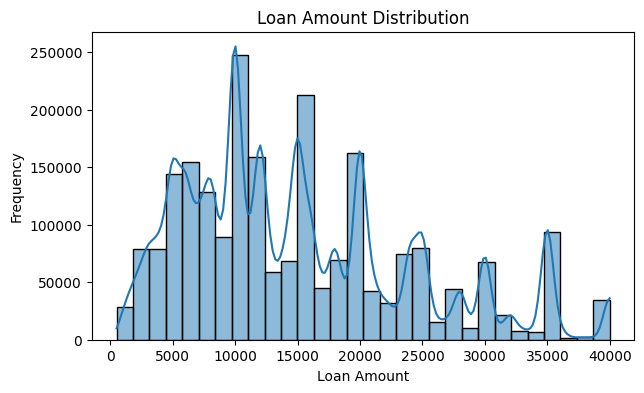

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.histplot(df_core['loan_amnt'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()


### Interest Rate Distribution

We plotted the distribution of interest rates for accepted loans to better understand the cost of borrowing on LendingClub over time.

**Key findings:**
- The distribution is right-skewed, with most loans having interest rates between 7% and 18%.
- There are several noticeable spikes at certain rate levels (such as around 7%, 10%, 13%, 15%, and 18%), which may correspond to platform-defined credit grades or product tiers.
- Interest rates above 20% are much less common, and very high rates (above 25%) are rare.
- The KDE line shows that while rates vary continuously, there are preferred bands, reflecting institutional or policy-driven rate setting.

This visualization reveals that the platform tends to approve loans within a moderate interest rate range, with relatively few loans at extremely high or low rates. This is consistent with risk-based pricing and tiered credit evaluation in marketplace lending.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


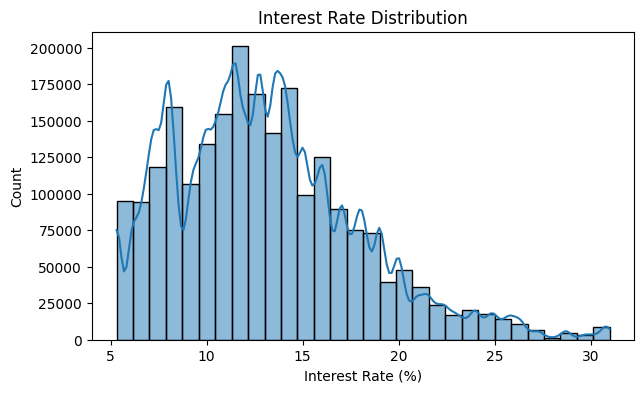

In [21]:
plt.figure(figsize=(7,4))
sns.histplot(
    df_core['int_rate'].astype(str).str.rstrip('%').astype(float), 
    bins=30, kde=True
)
plt.title("Interest Rate Distribution")
plt.xlabel("Interest Rate (%)")
plt.show()


### Grade Distribution

We visualized the distribution of loan grades assigned by LendingClub to gain insight into the risk segmentation of the borrower pool.

**Key findings:**
- Most loans fall into grades B and C, followed by A and D, indicating that the majority of approved borrowers are assessed to have moderate-to-good credit risk.
- Very few loans are issued with grades F or G, suggesting stricter approval standards or lower demand for higher-risk loans.
- The grade distribution is right-skewed: as risk increases (grade goes from A to G), the number of loans sharply declines.
- Grades are an important categorical feature for credit risk modeling, reflecting the platform’s internal assessment of borrower risk.

This pattern highlights LendingClub’s focus on borrowers with acceptable to moderate risk, aligning with risk management practices and platform guidelines.


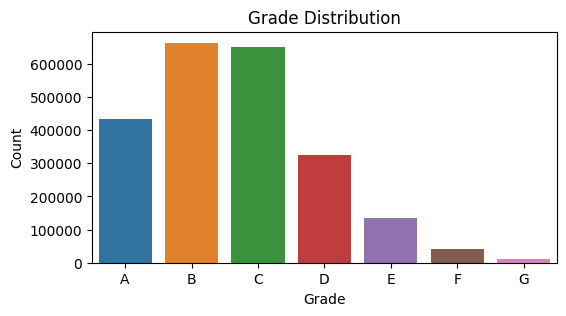

In [18]:
plt.figure(figsize=(6,3))
sns.countplot(x='grade', data=df_core, order=sorted(df_core['grade'].dropna().unique()))
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()


### Loan Purpose Distribution

To better understand why customers apply for loans on LendingClub, we visualized the distribution of loan purposes.

**Key findings:**
- The majority of loans are taken out for **debt consolidation**, followed by **credit card refinancing** and **home improvement**. These three categories represent the most common reasons for borrowing.
- Less frequent loan purposes include major purchases, medical expenses, small business, car, and vacation, with categories like wedding, moving, house, renewable energy, and educational purposes making up a very small fraction of the total.
- This distribution shows that most borrowers use LendingClub to manage existing debt or improve their financial position, rather than for consumption or investment purposes.

Understanding loan purposes is crucial for risk modeling and portfolio management, as different purposes may be associated with different default risks and borrower profiles.


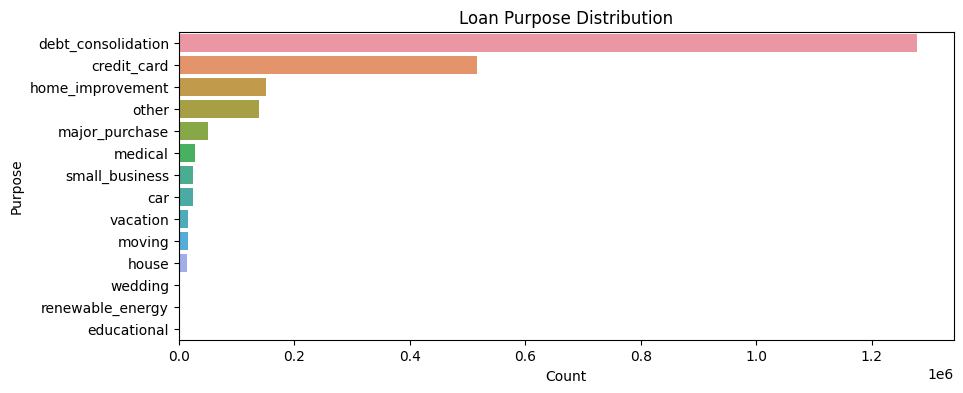

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(y='purpose', data=df_core, order=df_core['purpose'].value_counts().index)
plt.title("Loan Purpose Distribution")
plt.xlabel("Count")
plt.ylabel("Purpose")
plt.show()


### Annual Income Distribution (Capped at 200k)

We visualized the annual income distribution of LendingClub borrowers, capping incomes at $200,000 to reduce the effect of extreme outliers.

**Key findings:**
- Most borrowers have annual incomes between $40,000 and $100,000, with a clear right-skewed distribution.
- The income distribution peaks around $60,000, suggesting this is the most common income level among loan applicants.
- While some borrowers report much higher incomes, these are relatively rare and were excluded from this plot for clarity.
- The long tail to the right highlights the presence of a few high-income applicants, but the vast majority fall below $120,000 per year.

This analysis helps us understand the general financial profile of LendingClub users and provides useful context for further risk and credit modeling.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


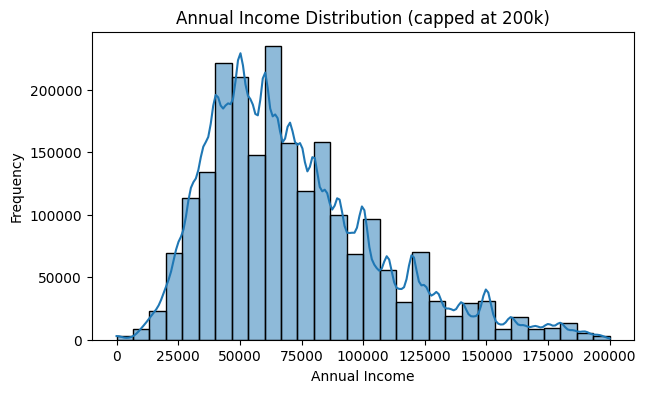

In [20]:
plt.figure(figsize=(7,4))
sns.histplot(df_core['annual_inc'][df_core['annual_inc'] < 200000], bins=30, kde=True)
plt.title("Annual Income Distribution (capped at 200k)")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()


### Debt-to-Income (DTI) Distribution (capped at 40)

We visualized the distribution of the debt-to-income (DTI) ratio among LendingClub borrowers, capping values at 40 to reduce the influence of outliers.

**Key findings:**
- Most borrowers have a DTI ratio between 5 and 30, with the distribution peaking around 20.
- Very few applicants report a DTI above 35, as higher DTI ratios typically indicate higher credit risk and may reduce approval chances.
- The distribution is roughly bell-shaped, suggesting that the majority of borrowers fall within a moderate range of debt burden relative to their income.

Understanding DTI distribution is crucial, as DTI is a key metric in credit risk assessment and loan underwriting. Borrowers with lower DTI are generally less likely to default, making this variable important for both modeling and business decision-making.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


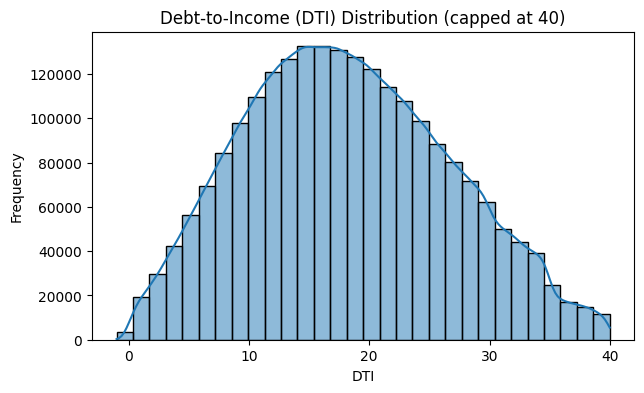

In [23]:
plt.figure(figsize=(7,4))
sns.histplot(df_core['dti'][df_core['dti'] < 40], bins=30, kde=True)
plt.title("Debt-to-Income (DTI) Distribution (capped at 40)")
plt.xlabel("DTI")
plt.ylabel("Frequency")
plt.show()


### Employment Length Distribution

We visualized the employment length of borrowers to understand their work experience distribution.

**Key findings:**
- The majority of applicants reported having "10+ years" of employment, suggesting a substantial portion of seasoned workers among LendingClub borrowers.
- Other categories are relatively evenly distributed, but each is much smaller than the "10+ years" group.
- There are also some borrowers who reported "< 1 year" of employment or marked as "n/a", which may correspond to new entrants to the workforce or those not reporting their employment length.

The dominance of the "10+ years" category may indicate that experienced professionals are more likely to apply for loans or are more likely to be approved. Employment length can be a crucial factor for risk assessment in credit models.


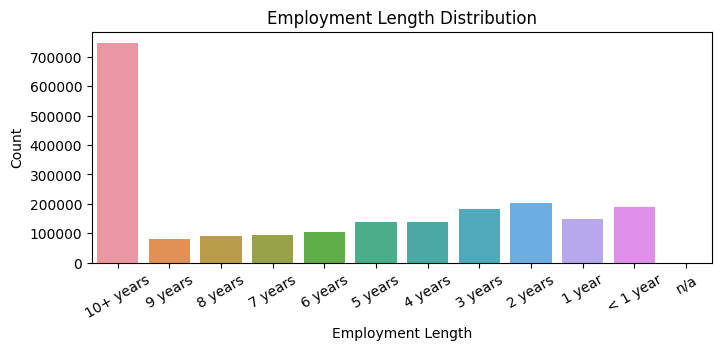

In [24]:
plt.figure(figsize=(8,3))
sns.countplot(x='emp_length', data=df_core, order=[
    '10+ years', '9 years', '8 years', '7 years', '6 years', '5 years',
    '4 years', '3 years', '2 years', '1 year', '< 1 year', 'n/a'
])
plt.title("Employment Length Distribution")
plt.xlabel("Employment Length")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


### Home Ownership Distribution

We examined the distribution of home ownership status among LendingClub borrowers.

**Key findings:**
- The majority of borrowers either have a mortgage or are renting, with "MORTGAGE" being the most common status.
- A smaller but significant portion of borrowers fully own their homes ("OWN").
- The remaining categories, such as "ANY", "NONE", and "OTHER", are very rare in this dataset.

These results suggest that most applicants either have ongoing mortgage payments or rent their primary residence, reflecting the typical financial profiles of personal loan applicants. Home ownership status can be a relevant variable in credit risk assessment, as it may indicate financial stability or existing debt obligations.


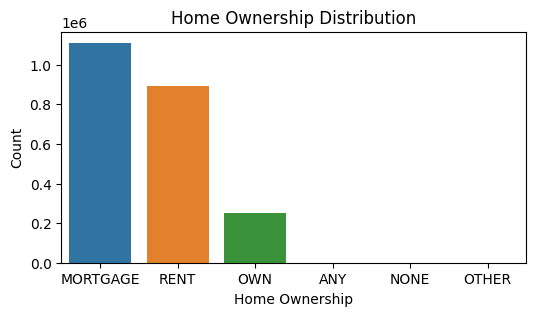

In [25]:
plt.figure(figsize=(6,3))
sns.countplot(x='home_ownership', data=df_core)
plt.title("Home Ownership Distribution")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.show()


### Loan Status Distribution

We visualized the distribution of loan status categories among LendingClub loans.

**Key findings:**
- The majority of loans are either **Fully Paid** or **Current**, indicating that most borrowers are up-to-date or have successfully completed their payments.
- A significant portion of loans has been **Charged Off**, reflecting defaults or major delinquencies.
- Other statuses, such as "In Grace Period," "Late," and "Default," account for a small share of the dataset.
- There are also a few loans that do not meet the credit policy, either "Fully Paid" or "Charged Off," which represent special cases according to LendingClub's internal standards.

This distribution provides insight into repayment behaviors and default risks in the dataset. Understanding the proportion of each loan status is crucial for downstream analysis, especially for credit risk modeling and predicting default or charge-off events.


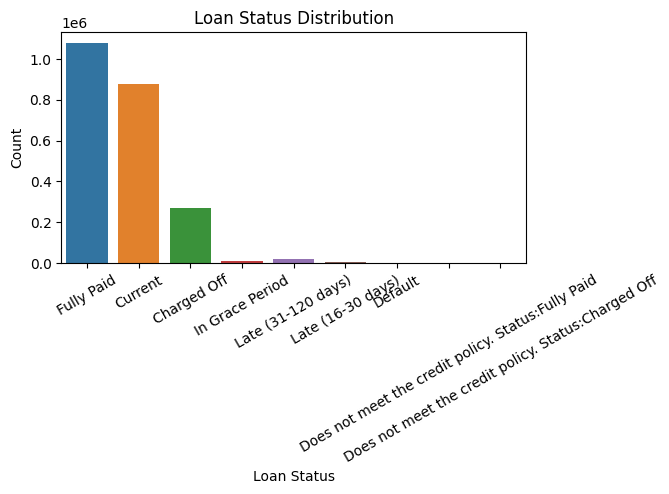

In [26]:
plt.figure(figsize=(6,3))
sns.countplot(x='loan_status', data=df_core)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


### Default Rate Analysis by Key Features

In this section, we focus on **default rate analysis** for LendingClub loans, restricting the sample to loans with either "Fully Paid" or "Charged Off" status.

The analysis is carried out in three ways:
1. **By Credit Grade:**  
   - We calculate and plot the default rate (i.e., the proportion of "Charged Off") for each LendingClub credit grade (A–G).  
   - This helps visualize how credit risk varies with grade assignments.

2. **By Loan Purpose:**  
   - We compute and visualize the default rate for different loan purposes (e.g., debt consolidation, credit card, small business, etc.).  
   - This provides insight into which loan purposes are associated with higher or lower default risks.

3. **By Loan Amount Bin:**  
   - We create bins for loan amounts and calculate the default rate within each bin.  
   - This analysis reveals whether loan size is related to the likelihood of default.

These analyses provide a comprehensive view of the main drivers of default risk, which is crucial for credit risk modeling, pricing, and portfolio management in consumer lending.


### Default Rate Analysis by Feature

In this section, we examine how the default (charge-off) rate varies across several key features of the LendingClub loan dataset. Specifically, we analyze default rates by **credit grade**, **loan purpose**, and **loan amount bins**.

**Key Steps:**
- We restrict the analysis to loans with statuses "Fully Paid" or "Charged Off", and create a binary variable (`is_default`) to indicate whether a loan was charged off.
- We then group the data by each feature to compute and visualize the average default rate for each group.

#### 1. Default Rate by Credit Grade

- Default rates increase significantly as credit grade declines from A to G.
- For example, grade A has a default rate of ~6%, while grade G exceeds 49%.
- This pattern confirms that the credit grade assigned by LendingClub is a strong indicator of loan risk.

#### 2. Default Rate by Loan Purpose

- The lowest default rates are observed in loans for purposes like **wedding**, **car**, and **credit card** consolidation.
- Higher default rates are seen for purposes such as **moving**, **renewable energy**, and **small business** loans.
- This suggests that the stated purpose of the loan is an important factor in risk assessment.

#### 3. Default Rate by Loan Amount

- Default rates tend to increase as loan amount increases.
- Loans below \$5,000 have a default rate of about 15.8%, while those in the \$20,000-\$40,000 range have a default rate above 23%.
- This result implies that larger loans are riskier, possibly due to borrower overextension.

**Conclusion:**  
The analysis reveals that credit grade, loan purpose, and loan amount all have significant and intuitive relationships with the probability of default. These insights can help in credit risk modeling and underwriting strategies.


Default rate by credit grade:
 grade
A    0.060407
B    0.133852
C    0.224396
D    0.303822
E    0.384784
F    0.452024
G    0.499343
Name: is_default, dtype: float64


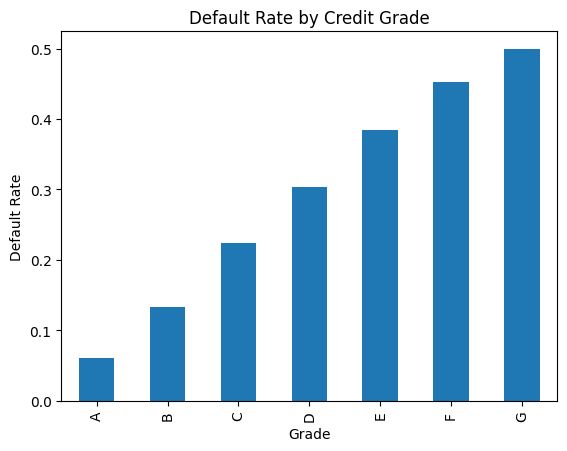

Default rate by loan purpose:
 purpose
wedding               0.121622
car                   0.146795
credit_card           0.169270
educational           0.171779
home_improvement      0.177158
major_purchase        0.185998
vacation              0.191726
other                 0.210401
debt_consolidation    0.211469
medical               0.217757
house                 0.218806
moving                0.233544
renewable_energy      0.236870
small_business        0.297094
Name: is_default, dtype: float64


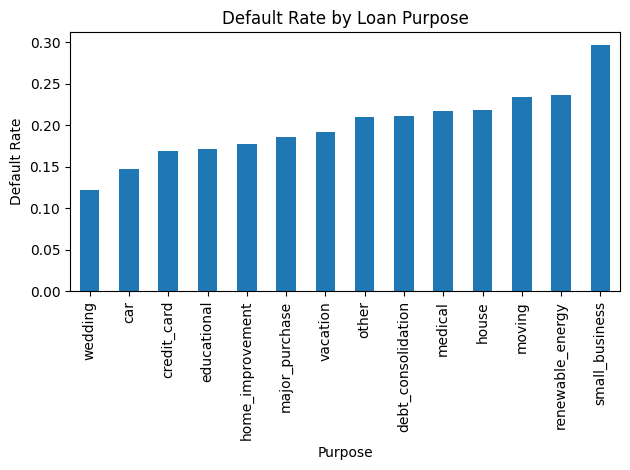

Default rate by loan amount bin:
 loan_amnt_bin
(0, 5000]         0.157682
(5000, 10000]     0.172061
(10000, 15000]    0.207666
(15000, 20000]    0.226305
(20000, 40000]    0.233670
Name: is_default, dtype: float64


/var/folders/bt/159y_h211qb_80xw9cxg53rw0000gn/T/ipykernel_56497/3045049384.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_amount = df_core.groupby('loan_amnt_bin')['is_default'].mean()


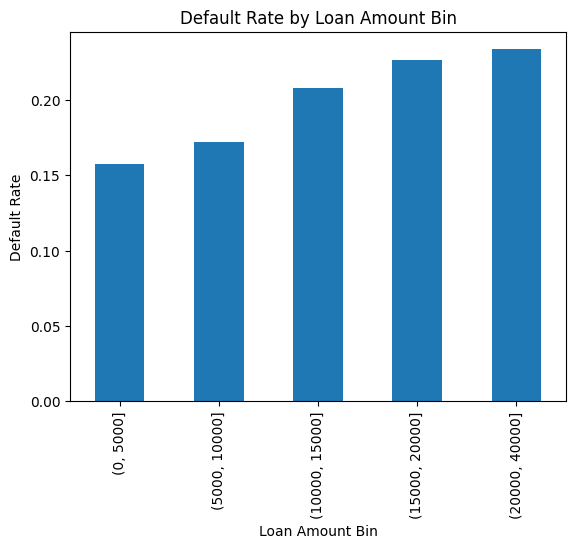

In [38]:
# 1. Only keep "Fully Paid" and "Charged Off"
df_core = accept[core_cols].copy()
df_core = df_core[df_core['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()
df_core['is_default'] = (df_core['loan_status'] == 'Charged Off').astype(int)

# 2. Calculate default rate by credit grade
default_by_grade = df_core.groupby('grade')['is_default'].mean().sort_index()
print("Default rate by credit grade:\n", default_by_grade)

import matplotlib.pyplot as plt
default_by_grade.plot(kind='bar')
plt.title("Default Rate by Credit Grade")
plt.xlabel("Grade")
plt.ylabel("Default Rate")
plt.show()

# 3. Calculate default rate by loan purpose
default_by_purpose = df_core.groupby('purpose')['is_default'].mean().sort_values()
print("Default rate by loan purpose:\n", default_by_purpose)

default_by_purpose.plot(kind='bar')
plt.title("Default Rate by Loan Purpose")
plt.xlabel("Purpose")
plt.ylabel("Default Rate")
plt.tight_layout()
plt.show()

# 4. Calculate default rate by loan amount bin
import numpy as np
bins = [0, 5000, 10000, 15000, 20000, 40000]
df_core['loan_amnt_bin'] = pd.cut(df_core['loan_amnt'], bins)
default_by_amount = df_core.groupby('loan_amnt_bin')['is_default'].mean()
print("Default rate by loan amount bin:\n", default_by_amount)

default_by_amount.plot(kind='bar')
plt.title("Default Rate by Loan Amount Bin")
plt.xlabel("Loan Amount Bin")
plt.ylabel("Default Rate")
plt.show()



### Credit Default Prediction Modeling

In this section, we develop machine learning models to predict whether a loan will default (i.e., be charged off) using key borrower and loan features from the LendingClub dataset.

**Key Steps:**

1. **Feature Selection & Preprocessing:**  
   - Selected relevant features: loan amount, interest rate, credit grade, annual income, DTI (debt-to-income), home ownership, and loan purpose, along with the binary target variable `is_default`.
   - Categorical features (`grade`, `home_ownership`, `purpose`) are encoded using `LabelEncoder`.
   - Missing values are dropped to ensure clean training data.

2. **Train-Test Split:**  
   - The data is split into training and test sets (80/20 split) for model evaluation.

3. **Model Training:**  
   - **Logistic Regression:** Trained a logistic regression model as a baseline classifier.
   - **Random Forest:** Trained a random forest classifier for comparison and feature importance analysis.

4. **Evaluation:**  
   - For both models, classification reports (precision, recall, F1-score) are printed on the test set.
   - ROC-AUC scores are calculated to assess the models’ ability to distinguish between defaults and non-defaults.

5. **Feature Importance:**  
   - The feature importances from the random forest are visualized to identify the most influential factors for predicting loan default.

This workflow allows us to quantitatively assess the predictability of loan default using basic customer and loan information, and to compare the effectiveness of different machine learning models for credit risk evaluation.


### Model Performance and Results Interpretation

#### 1. **Classification Results**
- **Logistic Regression:**
  - The model achieves an overall accuracy of 80%. However, the recall for the default class (`1`) is extremely low (0.00), indicating the model fails to identify defaults, despite a reasonable precision (0.30) for this class.
  - The AUC (Area Under the ROC Curve) is 0.557, suggesting the model only slightly outperforms random guessing for this imbalanced classification task.

- **Random Forest:**
  - The random forest classifier has a slightly lower overall accuracy (79%) but improves recall for the default class to 0.11, with higher precision (0.42). 
  - The AUC increases to 0.667, indicating a better ability to distinguish between defaults and non-defaults than logistic regression, but still limited by class imbalance and model complexity.

#### 2. **Feature Importance**
- The random forest model's feature importance plot shows that **DTI (debt-to-income ratio)**, **annual income**, **loan amount**, and **interest rate** are the most influential predictors of default risk.
- Categorical features such as **purpose**, **grade**, and especially **home ownership** contribute less to the prediction, suggesting that quantitative financial variables are more useful for this task in this dataset.

#### 3. **Implications and Limitations**
- Both models suffer from class imbalance: defaults (`is_default=1`) are much less frequent, leading to high accuracy for the majority class but low recall for defaults.
- While the random forest improves upon logistic regression in identifying defaulters, the recall for defaults remains low, indicating that more sophisticated techniques (e.g., resampling, alternative models, cost-sensitive learning) may be needed for credit risk detection.
- The relative importance of features highlights where risk managers or lenders should focus: monitoring DTI, reported annual income, loan size, and interest rate when assessing potential borrower risk.

#### 4. **Summary**
- The random forest model offers improved performance over logistic regression, particularly in identifying defaulters.
- Feature analysis suggests that borrower financial ratios and loan attributes are key determinants of default, while traditional categorical features add less predictive value.
- Future work could explore advanced resampling methods, more granular feature engineering, or alternative modeling techniques to further enhance predictive accuracy for loan defaults.


Logistic Classification Report
               precision    recall  f1-score   support

           0       0.80      1.00      0.89    215460
           1       0.30      0.00      0.00     53528

    accuracy                           0.80    268988
   macro avg       0.55      0.50      0.45    268988
weighted avg       0.70      0.80      0.71    268988

Logistic Regression AUC: 0.557
Random Forest Classification Report：
               precision    recall  f1-score   support

           0       0.81      0.96      0.88    215460
           1       0.42      0.11      0.17     53528

    accuracy                           0.79    268988
   macro avg       0.61      0.53      0.53    268988
weighted avg       0.73      0.79      0.74    268988

Random Forest AUC: 0.667


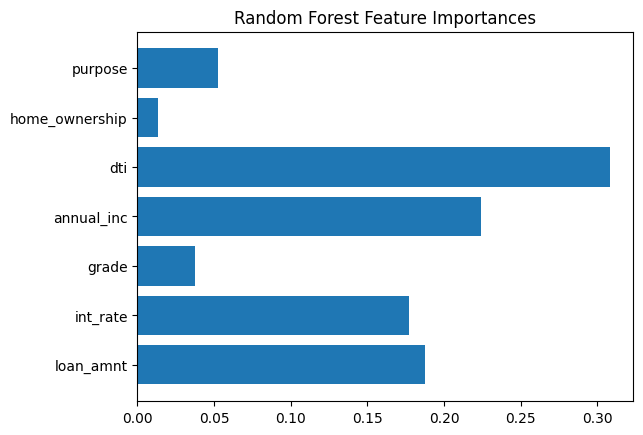

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression

# 1. Choose variables
model_cols = ['loan_amnt', 'int_rate', 'grade', 'annual_inc', 'dti', 'home_ownership', 'purpose', 'is_default']
model_df = df_core[model_cols].dropna().copy()

# 2. lable variables
for col in ['grade', 'home_ownership', 'purpose']:
    model_df[col] = LabelEncoder().fit_transform(model_df[col])

X = model_df.drop('is_default', axis=1)
y = model_df['is_default']

# 3. Split test set and train set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Classification Report\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression AUC: %.3f" % roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

# 5. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report：\n", classification_report(y_test, y_pred_rf))
print("Random Forest AUC: %.3f" % roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

# Visualize the feature importance of Random Forest
importances = rf.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Random Forest Feature Importances")
plt.show()
